In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [40]:
train=pd.read_csv("../input/newtrain_w2v_w28_t512.txt",header=None)
train.columns=['ID','topic','cnt']
train = pd.pivot_table(train, values='cnt', index=['ID'],
               columns=['topic'], aggfunc=np.sum)
train.shape

(3316, 512)

In [41]:
test=pd.read_csv("../input/newtest_w2v_w28_t512.txt",header=None)
test.columns=['ID','topic','cnt']
test = pd.pivot_table(test, values='cnt', index=['ID'],
               columns=['topic'], aggfunc=np.sum)
test.shape

(5667, 512)

In [42]:
train=train.apply(lambda u: u/u.sum(),axis=1)
test=test.apply(lambda u: u/u.sum(),axis=1)

In [43]:
(test.columns==train.columns).all()

True

In [44]:
joined=pd.concat([train,test])
joined.shape

(8983, 512)

In [45]:
idf=np.log(1/(joined>0).mean())

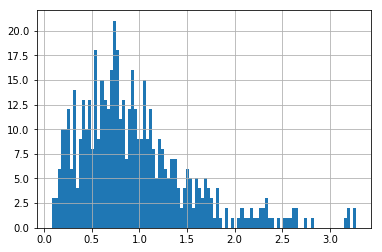

topic
192    0.081129
82     0.093153
83     0.104829
65     0.118020
482    0.133802
153    0.134948
152    0.153335
195    0.162460
497    0.162591
81     0.163770
196    0.163902
137    0.176439
90     0.179498
91     0.189001
68     0.189808
124    0.191424
67     0.196831
88     0.197374
89     0.200498
113    0.202813
69     0.206364
156    0.208830
194    0.220836
92     0.222643
202    0.223060
197    0.223478
121    0.227103
114    0.227942
470    0.229061
66     0.231584
         ...   
468    2.106408
449    2.151317
242    2.163835
244    2.164805
210    2.196334
187    2.229925
164    2.262543
484    2.271136
167    2.285259
78     2.314117
396    2.319764
84     2.330009
17     2.332300
304    2.368498
77     2.384076
486    2.456699
79     2.519680
487    2.544891
250    2.582468
241    2.604807
16     2.613884
76     2.636944
251    2.652619
413    2.750460
414    2.805980
415    3.170844
246    3.186887
240    3.186887
412    3.259545
247    3.274144
dtype: float64

In [46]:
idf.hist(bins=100);plt.show()
idf.sort_values()

In [47]:
#idf=1

In [48]:
train_tfidf=train*idf

In [49]:
train_tfidf[train_tfidf==0]=np.nan
train_tfidf.columns=['t512_'+str(u) for u in train_tfidf.columns]

In [50]:
train_tfidf.to_csv("../input/newtrain_topic512_w28_tfidf.csv")

In [51]:
train_tfidf.shape

(3316, 512)

In [52]:
test_tfidf=test*idf

In [53]:
test_tfidf[test_tfidf==0]=np.nan
test_tfidf.columns=['t512_'+str(u) for u in test_tfidf.columns]

In [54]:
test_tfidf.to_csv("../input/newtest_topic512_w28_tfidf.csv")

In [55]:
test_tfidf.shape

(5667, 512)

In [56]:
(train_tfidf>0).sum(1).hist(bins=100,normed=True)

In [57]:
(test_tfidf>0).sum(1).hist(bins=100,normed=True)